# A fast and robust statistical tool for simple number counting with uncertainty

Kyle Cranmer, June 18, 2015

[![](https://i.creativecommons.org/l/by/4.0/88x31.png)]( https://creativecommons.org/licenses/by/4.0/)

#Introduction

We consider the case of a simple number counting analysis with uncertainty on the background expectation.

First, let us consider the main number counting measurement.

The statistical model is: 


\begin{equation}
P(n|\nu_s, \nu_b) = Pois(n | \nu_s + \nu_b)
\end{equation}

where
  * $n$ is the observed number of events satisfying the selection
  * $\nu_s$ is the expected signal (the parameter of interest)
  * $\nu_b$ is the expected background (fixed now, but later a nuisance parameter)
  
*(Note, I'm using greek letters for parameters instead of $Pois(n|s+b)$)*



If the background were known exactly, then $\nu_b$ would be fixed. 

But if we have background uncertainty, then $\nu_b$ is a nuisance parameter that can float in a fit.

At this point, there is nothing indicating that we have some best guess for the background and uncertainty on that estimate.


# An intuitive way to add background uncertainty to the model

Let's say that we have some estimate for the background, something like $100 \pm 7$ events.
How do we incorporate that into the statistical model.  Instead of $100 \pm 7$, let's write $\nu_b^{exp} \pm \Delta_b$

A common and intuitive approach is that one would randomize the background expectation $\nu_b$ in the process of "generating toy Monte Carlo" to calculate p-values. 

In general, using Monte Carlo from to sample from a distribution can be seen as a form of integrtion. So if you were to randomly draw $\nu_b$ from a Gaussian centered at $\nu_b^{exp}$ with standard deviation of $\Delta$, that corresonds to the distribution $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$.  

Thus, the distribution of $n$ would be equivalent to

\begin{equation}
\\
P(n \,|\,\nu_s) = \int  Pois(n | \nu_s + \nu_b) \, Gaus(\nu_b | \nu_b^{exp}, \Delta_b) \, d\nu_b
\end{equation}

Did you notice that this is a Bayesian procedure?  If we were to calculate p-values, it would be a hybrid Bayesian-Frequentist procedure (sometimes referred to as the Cousins-Highland method).

You can spot that it is Bayesain easily because we used greek letters for the parameters. Whenever you see a distribution for a parameter -- eg. $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$ -- then it is Bayesian.  

Similarly, whenever you see integration with respect to a parameter (or Monte Carlo sampling of a parameter), then it is Bayesian.

# So what if it is Bayesian, it is based on a measurement.

Often the background estimate is based on a measurement. 

So while the distribution $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$ is considered a prior for this statistical model, it is not a completely subjective prior.

That's true, it's better to think of it as a posterior from some other measurement. 

So what is that other auxiliary measurement?
   * Let's call it $m$
   * so our example $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$ can be written schematically $\pi(\nu_b | m)$.

And remember Bayes theorem, the posterior is given by:

\begin{equation}
\underbrace{\pi(\nu_b | m)}_{posterior} = \underbrace{N}_{normalizaton} \,\,\, \underbrace{p(m|\nu_b)}_{likelihood} \,\,\, \underbrace{\eta(\nu_b )}_{original\, prior}
\end{equation}

The "problem", if you will, is that while the likelihood function for the measurement is based on physics considerations, the original prior $\eta(\nu_b)$ is more subjective. One can hope that the likelihood dominates the prior, but there is no escaping the presence of some original prior that is not based on an auxiliary experiment.

#So what how would you deal with this in a frequentist way?


As in all of our statistical problems (whether you are Bayesian or frequentist), the first step is to write down the full statistical model. In this case it involves to parts:
   * the main measurement (the "on" source part) $Pois(n| \nu_s + \nu_b)$
   * the auxiliary measurement (the "off" source part) $p(m | \nu_b)$
   
The total model is just the product of the two (assuming that the main and auxiliary measurements are statistically independent -- i.e. they have non-overlapping selection, are disjoint, or "orthogonal")
\begin{equation}
  P(n,m | \nu_s, \nu_b) = Pois(n| \nu_s + \nu_b) \, p(m | \nu_b)
\end{equation}

Now maybe we should think harder about that auxiliary measurement.
   * maybe we only have an best fit value and uncertainty $\nu_b^{best fit} \pm \Delta_b$, then a Gaussian is not a bad choice if $\Delta_b \ll \nu_b^{best fit}$,
   * or maybe it was also a number counting experiment $p(m|\nu_b) = Pois(m|\nu_b)$
   
In what follows, I will assume that the auxiliary measurement is also based on number counting. 


# The on/off problem


When the auxiliary measurement is also number counting, then the full model is 
\begin{equation}
  P(n,m | \nu_s, \nu_b) = Pois(n| \nu_s + \nu_b) \, Pois(m | \tau \nu_b) \,
\end{equation}
where $\tau$ is a known, constant extrapolation factor that relates the background expectation in the signal region to the control region of the auxiliary measurement.  (One can, generalize the situation when there is uncertainty on $\tau$, but that is beyond the scope of this presentation.

This problem is now quite well studied, and a good prototype for dealing with nuisance parameters in a frequentist way. 

The problem is sometimes called the on/off problem (from it's background in astrophysics) or the "prototype problem" in some of the PhyStat literature. Relevant publicatons:
 * [Ti-pei Li and Yu-qian Ma, Astrophysical Journal 272 (1983) 317–324.](http://adsabs.harvard.edu/full/1983ApJ...272..317L)
 * Robert D. Cousins, James T. Linnemann and Jordan Tucker, NIM A 595 (2008) 480– 501; [arXiv:physics/0702156](http://arxiv.org/abs/physics/0702156)



# The profile likelihood for this problem

We will base the following statistical analysis on the profile likelihood ratio, which is described in 
 * Cowan, Cranmer, Gross, Vitells, Eur. Phys. J. C 71 (2011) 1554.
[arXiv:1007.1727](http://arxiv.org/abs/1007.1727)

In this case there is one nuisance parameter and one parameter of interest, so the profile likelihood ratio is:
\begin{equation}
 \lambda(\nu_s) = \frac{P(n,m | \nu_s, \hat{\hat{\nu_b}}(\nu_s) )}{P(n,m | \hat \nu_s, \hat\nu_b)} \; ,
\end{equation}
where 
   * $\hat \nu_s$ and $\hat\nu_b$ are the maximum likelihood estimates, and
   *  $\hat{\hat{\nu_b}}(\nu_s)$ is the conditional maximum likelihood estimate of $\nu_b$ for a fixed value of $\nu_s$.


In this case, $\hat \nu_s$,  $\hat\nu_b$, and $\hat{\hat{\nu_b}}(\nu_s)$ can all be solved in closed form. Thus one need not run MINUIT or another optimizer. This makes the code fast and robust.

# Fasimov: 
### fast code using asymptotic approximations to distribution of the profile likelihood and the Asimov data

Below I demo some pure python code for the on/off problem.

The code can be found here:
[https://github.com/cranmer/fast-asimov-utils](https://github.com/cranmer/fast-asimov-utils)

In [1]:
#Populate the interactive namespace from numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import matplotlib.pyplot as plt
#import numpy as np

In [3]:
import fasimov 
dir(fasimov)

['CLbArgumentWrapper',
 'CLs',
 'CLsArgumentWrapper',
 'CLsArgumentWrapper_qmu',
 'CLs_qmu',
 'ExpectedLimit',
 'ExpectedLimitBand',
 'ExpectedSignificance',
 'ExpectedSignificance2',
 'F',
 'ObsExpAndBands_Limits',
 'ObservedLimit',
 'ObservedSignificance',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'abs',
 'bhat',
 'bhathat',
 'brentq',
 'division',
 'log',
 'logL',
 'logLambda',
 'norm',
 'qmuBand',
 'shat',
 'sigma',
 'sqrt']

# The MLE and Conditional MLE


The equations for $\hat \nu_s$,  $\hat\nu_b$, and $\hat{\hat{\nu_b}}(\nu_s)$ are coded up.

For the code $\nu_s \to$ `s` or `s_exp` , $\nu_b \to$ `b_exp`

In [4]:
fasimov.bhat(n=120, m=50, tau=1)

50.0

In [5]:
fasimov.shat(n=120, m=50, tau=1)

70.0

In [6]:
#the best fit background assuming s=0
fasimov.bhathat(n=120,m=50,tau=1,s=0) 

85.0

# The profile likelihood ratio


In [7]:
s = np.linspace(0,150) #make a numpy array for signal values to test

(0, 15)

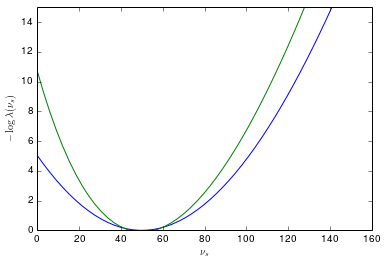

In [8]:
bhathat = s.copy() 
expSig = s.copy() 
logL = s.copy()
logLambda = s.copy()
for i, ss in enumerate(s):
    bhathat[i] = fasimov.bhathat(150,100,ss,1)
    expSig[i] = fasimov.ExpectedSignificance(ss,100,.1)
    logL[i] = fasimov.logL(150,100,ss,bhathat[i],1)+1000-37
    logL[i] = fasimov.logL(150,100,ss,100,1)+1000-38
    logLambda[i] = fasimov.logLambda(150,100,ss,1)
plt.plot(s,logLambda)    
plt.plot(s,logL)    

# use latex for font rendering
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=True)

plt.xlabel(r'$\nu_s$')
plt.ylabel(r'$-\log \lambda(\nu_s)$')
plt.ylim(0,15)



#Limits and Significance

In [9]:
fasimov.ExpectedSignificance(s=27.85,b=100,deltaB=10)

1.8473277707512268

In [10]:
fasimov.ObservedSignificance(n=127.85,b=100,deltaB=10)

3.41261989259 1.0


1.8473277707512374

In [11]:
[obs, m2,m1,exp, p1,p2] = fasimov.ObsExpAndBands_Limits(nObs=110,bExp=100,deltaB=10)
print "obs=%.2f, -2 sigma=%.2f, -1 sigma=%.2f, exp=%.2f, +1 sigma = %.2f, +2 sigma = %.2f" %(obs,m2,m1,exp,p1,p2)

hit boundary
obs=38.59, -2 sigma=14.89, -1 sigma=20.02, exp=27.85, +1 sigma = 38.92, +2 sigma = 52.54


In [12]:
fasimov.ExpectedLimitBand(bExp=100,deltaB=10,sigmaBand=-1)

20.018156448334437

In [13]:
fasimov.ExpectedSignificance(s=20.9,b=100,deltaB=.1)

2.0227824543154633

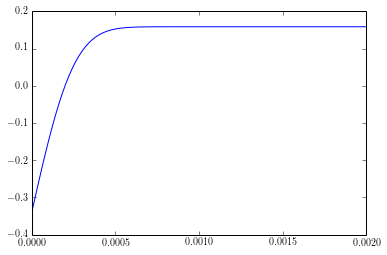

In [14]:
qmuTest = np.linspace(0,.002,100)

CLb = qmuTest.copy()
for i,qq in enumerate(qmuTest):
    CLb[i] = fasimov.CLbArgumentWrapper(qq, 0.001, 100, 10000.0, 100.0, -1.0)
    #CLb[i] = fau.F(float(qq),float(30.),float(0),float(sig))
plt.plot(qmuTest,CLb)

In [1]:
%pylab inline
import fasimov 
fasimov.testReload()

Populating the interactive namespace from numpy and matplotlib


AttributeError: 'module' object has no attribute 'testReload'

hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary
hit boundary


(0, 1)

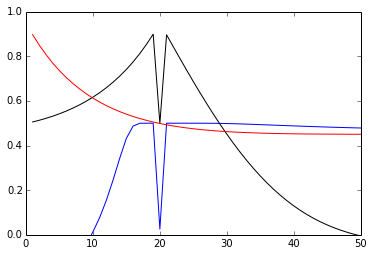

In [6]:
sTest = np.linspace(1,50,50)

CLb_obs = sTest.copy()
CLb_exp = sTest.copy()
CLs_obs = sTest.copy()
CLs_exp = sTest.copy()

for i,s in enumerate(sTest):
    qtest =fasimov.qmuBand(s, bExp=100., deltaB=10., sigmaBand=0.)
    qtest_b =fasimov.qmuBand(s=0.1, bExp=100., deltaB=10., sigmaBand=0.)

    CLb_obs[i] = fasimov.CLbArgumentWrapper(qtest, s,n=120,m=100,tau=1.,sigmaBand=0.)
    CLb_exp[i] = fasimov.CLbArgumentWrapper(qtest_b, s,n=100,m=100,tau=1.,sigmaBand=0.)
    CLs_obs[i] = fasimov.CLsArgumentWrapper(s,n=120, m=100,tau=1)
    CLs_exp[i] = fasimov.CLsArgumentWrapper(s,n=100+s, m=100,tau=1)

plt.plot(sTest,CLb_obs, c='blue')
plt.plot(sTest,CLb_exp, c='green')
plt.plot(sTest,CLs_obs, c='black')
plt.plot(sTest,CLs_exp, c='r')
plt.ylim(0,1)